In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


## EDA AND PREPROCESSING

In [4]:
df.drop(["id","host_id","name","host_name","latitude","longitude","last_review","reviews_per_month"], axis=1,inplace = True)

In [5]:
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [6]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
df["neighbourhood"].value_counts()

Williamsburg                  3920
Bedford-Stuyvesant            3714
Harlem                        2658
Bushwick                      2465
Upper West Side               1971
Hell's Kitchen                1958
East Village                  1853
Upper East Side               1798
Crown Heights                 1564
Midtown                       1545
East Harlem                   1117
Greenpoint                    1115
Chelsea                       1113
Lower East Side                911
Astoria                        900
Washington Heights             899
West Village                   768
Financial District             744
Flatbush                       621
Clinton Hill                   572
Long Island City               537
Prospect-Lefferts Gardens      535
Park Slope                     506
East Flatbush                  500
Fort Greene                    489
Murray Hill                    485
Kips Bay                       470
Flushing                       426
Ridgewood           

## relation of categorical data with price

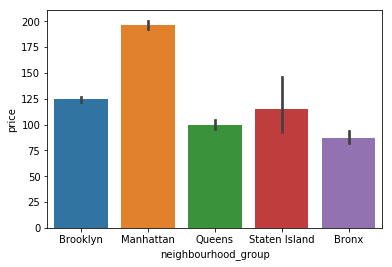

In [8]:
plt.figure()
sns.barplot(data=df,x="neighbourhood_group",y="price")
plt.show()

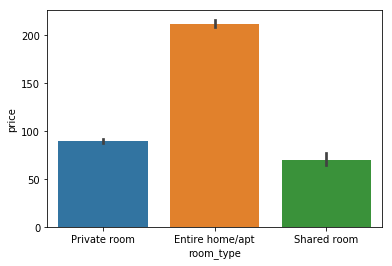

In [9]:
plt.figure()
sns.barplot(data=df,x="room_type",y="price")
plt.show()

## conversion of categorical data to int

In [10]:
le = LabelEncoder()

In [11]:
df["neighbourhood_group"] = le.fit_transform(df["neighbourhood_group"])

In [12]:
df["neighbourhood_group"] = df["neighbourhood_group"].astype("int64")

In [13]:
df["neighbourhood"] = le.fit_transform(df["neighbourhood"])

In [14]:
df["neighbourhood"] = le.fit_transform(df["neighbourhood"])

In [15]:
df["room_type"] = le.fit_transform(df["room_type"])

In [16]:
df["room_type"] = le.fit_transform(df["room_type"])

In [17]:
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,1,108,1,149,1,9,6,365
1,2,127,0,225,1,45,2,355
2,2,94,1,150,3,0,1,365
3,1,41,0,89,1,270,1,194
4,2,61,0,80,10,9,1,0


## Distribution of numeric features wrt price and handeling skewness

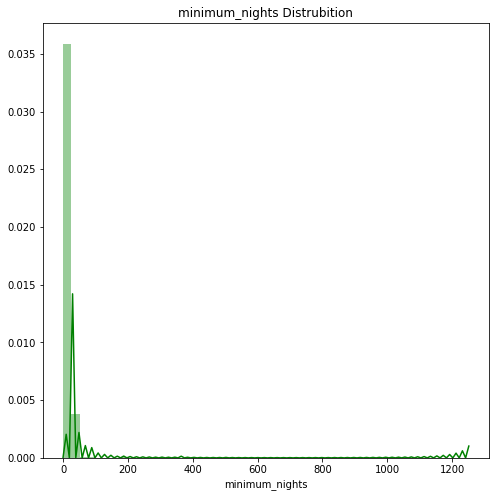

In [18]:
plt.figure(figsize=(8,8))
sns.distplot(df['minimum_nights'],color='g');
plt.title("minimum_nights Distrubition")
plt.show()

In [19]:
skew(df["minimum_nights"])

21.826604907169408

In [20]:
df["minimum_nights"] = np.sqrt(df["minimum_nights"])

In [21]:
skew(df["minimum_nights"])

3.908350250942745

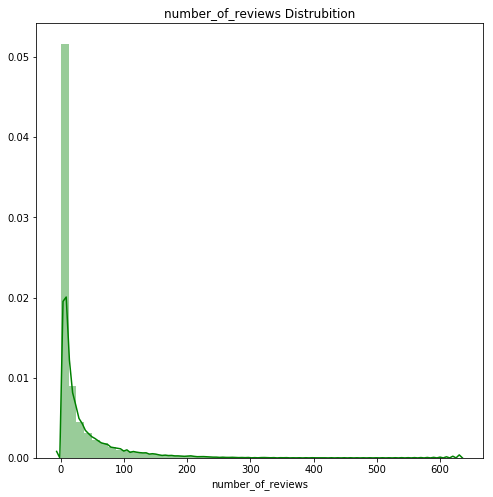

In [22]:
plt.figure(figsize=(8,8))
sns.distplot(df['number_of_reviews'],color='g');
plt.title("number_of_reviews Distrubition")
plt.show()

In [23]:
skew(df["number_of_reviews"])

3.6905213494042934

In [24]:
df["number_of_reviews"] = np.sqrt(df["number_of_reviews"])

In [25]:
skew(df["number_of_reviews"])

1.486975093652006

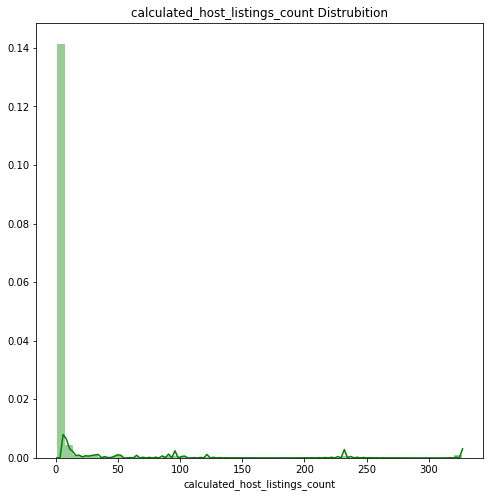

In [26]:
plt.figure(figsize=(8,8))
sns.distplot(df['calculated_host_listings_count'],color='g');
plt.title("calculated_host_listings_count Distrubition")
plt.show()

In [27]:
skew(df["calculated_host_listings_count"])

7.932930523838819

In [28]:
df["calculated_host_listings_count"] = np.sqrt(df["calculated_host_listings_count"])

In [29]:
skew(df["calculated_host_listings_count"])

5.5203599710937885

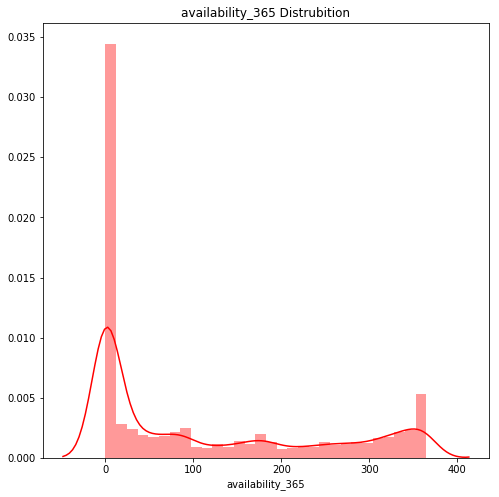

In [30]:
plt.figure(figsize=(8,8))
sns.distplot(df['availability_365'],color='r');
plt.title("availability_365 Distrubition")
plt.show()

In [31]:
skew(df["availability_365"])

0.7633841571088492

In [32]:
df["availability_365"] = np.sqrt(df["availability_365"])

In [33]:
skew(df["availability_365"])

0.27438053806373536

## Correlation

In [34]:
df.corr()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
neighbourhood_group,1.000000,0.111333,-0.016337,0.044246,0.017808,-0.003318,0.090722,0.081406
neighbourhood,0.111333,1.000000,-0.071964,0.062057,0.047000,-0.048391,0.010388,-0.040981
room_type,-0.016337,-0.071964,1.000000,-0.249350,-0.139488,-0.007271,-0.066271,0.016316
price,0.044246,0.062057,-0.249350,1.000000,0.052738,-0.066704,0.052247,0.078805
minimum_nights,0.017808,0.047000,-0.139488,0.052738,1.000000,-0.189182,0.310987,0.187315
number_of_reviews,-0.003318,-0.048391,-0.007271,-0.066704,-0.189182,1.000000,-0.108571,0.249411
calculated_host_listings_count,0.090722,0.010388,-0.066271,0.052247,0.310987,-0.108571,1.000000,0.301447
availability_365,0.081406,-0.040981,0.016316,0.078805,0.187315,0.249411,0.301447,1.000000


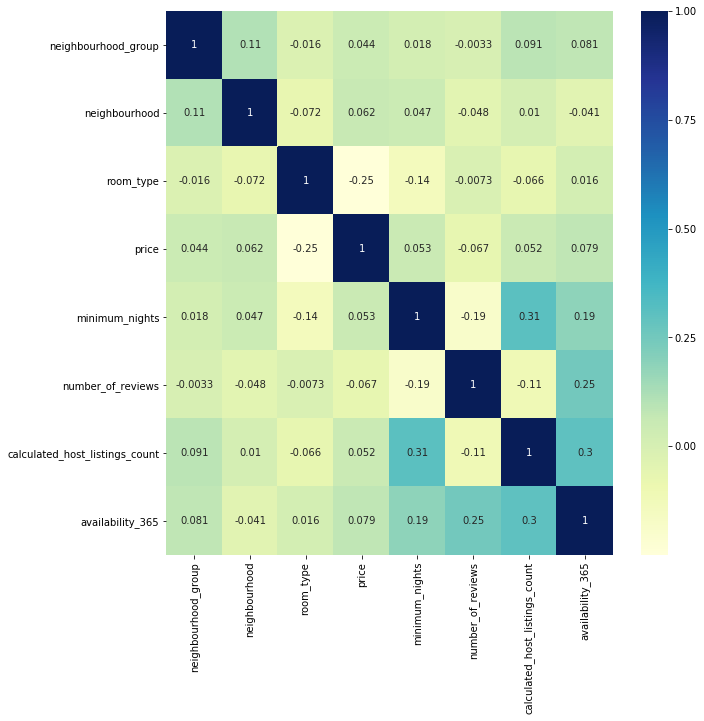

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

## Distribution of important features

In [36]:
X = df.loc[:,["neighbourhood_group","neighbourhood","room_type","minimum_nights","number_of_reviews","calculated_host_listings_count","availability_365"]]
y = df.iloc[:,3:4]

[]

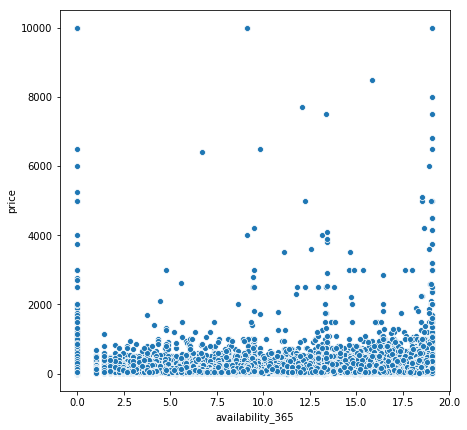

In [37]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='availability_365',y='price',data=df)
plt.plot()

[]

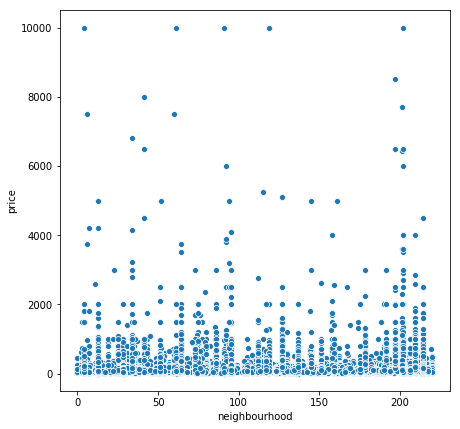

In [38]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='neighbourhood',y='price',data=df)
plt.plot()

[]

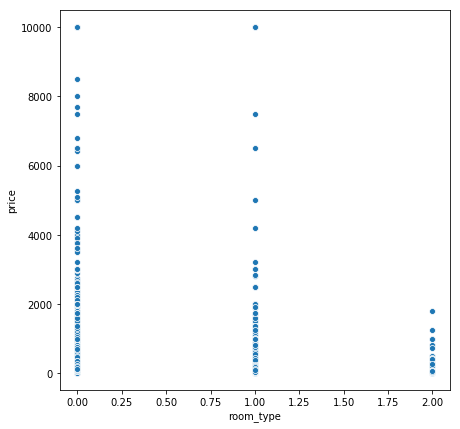

In [39]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='room_type',y='price',data=df)
plt.plot()

## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()

In [46]:
dt1 = train_model(dt1)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
         10       0.00      0.00      0.00         6
         12       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         0
         18       0.00      0.00      0.00         0
         19       0.00      0.00      0.00         1
         20       0.20      0.22      0.21         9
         21       0.00      0.00      0.00         4
         22       0.00      0.00      0.00         4
         23       0.00      0.00      0.00         2
         24       0.00      0.00      0.00         4
         25       0.06      0.08      0.07        25
         26       0.06      0.14      0.08         7
         27       0.00      0.00      0.00         7
         28       0.33      0.29      0.31        14
         29       0.00      0.00      0.00        19
         30       0.12      0.23      0.16   

In [47]:
dt1.feature_importances_

array([0.00848205, 0.1754372 , 0.01172676, 0.16669018, 0.2781685 ,
       0.0865341 , 0.2729612 ])

In [48]:
print(df.columns.tolist())

['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']


In [49]:
from sklearn import tree

In [51]:
dt2 = DecisionTreeClassifier(max_depth=10)

In [52]:
train_model(dt2)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
         10       0.00      0.00      0.00         6
         12       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         19       0.00      0.00      0.00         1
         20       0.11      0.22      0.15         9
         21       0.00      0.00      0.00         4
         22       0.00      0.00      0.00         4
         23       0.00      0.00      0.00         2
         24       0.00      0.00      0.00         4
         25       0.12      0.12      0.12        25
         26       0.20      0.14      0.17         7
         27       0.00      0.00      0.00         7
         28       1.00      0.21      0.35        14
         29       0.00      0.00      0.00        19
         30       0.21      0.15      0.18        66
         31       0.00      0.00      0.00        15
         32       0.30      0.13      0.18   

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
dt3 = DecisionTreeClassifier(min_samples_leaf=40)

In [54]:
train_model(dt3)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
         10       0.00      0.00      0.00         6
         12       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         19       0.00      0.00      0.00         1
         20       0.00      0.00      0.00         9
         21       0.00      0.00      0.00         4
         22       0.00      0.00      0.00         4
         23       0.00      0.00      0.00         2
         24       0.00      0.00      0.00         4
         25       0.14      0.12      0.13        25
         26       0.00      0.00      0.00         7
         27       0.00      0.00      0.00         7
         28       0.25      0.21      0.23        14
         29       0.00      0.00      0.00        19
         30       0.14      0.14      0.14        66
         31       0.00      0.00      0.00        15
         32       0.00      0.00      0.00   

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=40, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
dt4 = DecisionTreeClassifier(criterion='entropy')

In [56]:
train_model(dt4)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
         10       0.00      0.00      0.00         6
         11       0.00      0.00      0.00         0
         12       0.00      0.00      0.00         2
         13       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         0
         18       0.00      0.00      0.00         0
         19       0.00      0.00      0.00         1
         20       0.14      0.11      0.12         9
         21       0.00      0.00      0.00         4
         22       0.00      0.00      0.00         4
         23       0.00      0.00      0.00         2
         24       0.00      0.00      0.00         4
         25       0.08      0.08      0.08        25
         26       0.06      0.14      0.08         7
         27       0.00      0.00      0.00         7
         28       0.27      0.21      0.24   

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Train Test Score

In [58]:
lin = LinearRegression()

lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
# Train score
lin.score(X_train,y_train)

0.08594606844324038

In [60]:
# Test score
lin.score(X_test,y_test)

0.06832074638993146

In [61]:
lin.coef_

array([[   8.68839884,    0.16473194, -113.87200076,   -5.09094455,
          -7.22661171,   -0.40350814,    3.90128663]])

## Regularization - Ridge,Lasso

In [62]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [63]:
# Ridge
l2 = Ridge(1)
l2.fit(X_train,y_train)
l2.coef_

array([[   8.68799657,    0.1647389 , -113.860453  ,   -5.09030611,
          -7.22646425,   -0.40335334,    3.90121922]])

In [64]:
# Lasso helps in feature selection
l1 = Lasso(1000)
l1.fit(X_train,y_train)
l1.coef_

array([ 0.        ,  0.02811425, -0.        ,  0.        , -0.        ,
        0.        ,  0.        ])

In [69]:
for i in range(100):
    l2 = Ridge(alpha=i)
    l2.fit(X_train,y_train)
    print(i,":",l2.score(X_test,y_test))

0 : 0.06832074638993124
1 : 0.06832185831330018
2 : 0.06832296870507959
3 : 0.06832407756613146
4 : 0.06832518489731743
5 : 0.0683262906994978
6 : 0.06832739497353346
7 : 0.06832849772028426
8 : 0.06832959894060919
9 : 0.06833069863536767
10 : 0.06833179680541768
11 : 0.06833289345161708
12 : 0.06833398857482331
13 : 0.06833508217589301
14 : 0.06833617425568306
15 : 0.06833726481504876
16 : 0.06833835385484555
17 : 0.06833944137592829
18 : 0.0683405273791513
19 : 0.06834161186536836
20 : 0.06834269483543265
21 : 0.06834377629019694
22 : 0.06834485623051378
23 : 0.06834593465723482
24 : 0.06834701157121159
25 : 0.06834808697329431
26 : 0.06834916086433351
27 : 0.06835023324517897
28 : 0.06835130411668022
29 : 0.06835237347968559
30 : 0.06835344133504373
31 : 0.06835450768360207
32 : 0.06835557252620816
33 : 0.06835663586370866
34 : 0.06835769769694955
35 : 0.06835875802677693
36 : 0.06835981685403636
37 : 0.06836087417957193
38 : 0.06836193000422841
39 : 0.06836298432884924
40 : 0.06836

In [73]:
# Final models
l2 = Ridge(alpha=2)
l2.fit(X_train,y_train)
print(l2.score(X_test,y_test))

0.06832296870507959


In [74]:
l2.coef_

array([[   8.68759433,    0.16474586, -113.84890758,   -5.0896678 ,
          -7.22631681,   -0.40319856,    3.90115183]])

In [82]:
l1 = Lasso(alpha=1)
l1.fit(X_train,y_train)
print(l1.score(X_test,y_test))

0.06874815212737206


In [83]:
l1.coef_

array([ 6.80672617e+00,  1.68498909e-01, -1.10165527e+02, -4.49805383e+00,
       -7.01059851e+00, -6.72531780e-02,  3.81506482e+00])

In [84]:
#cross validation
from sklearn.model_selection import cross_val_score

In [85]:
l1_cross = cross_val_score(l1,X,y,cv=4)

In [86]:
l1_cross

array([0.05067743, 0.08272265, 0.08521616, 0.08506071])

In [87]:
l2_cross = cross_val_score(l2,X,y,cv=4)

In [88]:
l2_cross

array([0.05075595, 0.08211005, 0.08525851, 0.08495651])

In [89]:
np.mean(l1_cross)

0.07591923803906417

In [90]:
np.mean(l2_cross)

0.07577025297184362

## as per lasso applying linear regression on the feature neighbourhood

In [91]:
X = df[["neighbourhood"]]
y = df["price"]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [93]:
model = LinearRegression()

In [94]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
model.intercept_

128.28224506961655

In [96]:
model.coef_

array([0.23194046])

In [97]:
y_pred = model.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test,y_pred)

In [100]:
rmse = np.sqrt(mse)

In [101]:
r2 = r2_score(y_test,y_pred)

In [102]:
print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

mse: 54521.60636820445, rmse: 233.49862176938956, r2: 0.002588187235439743


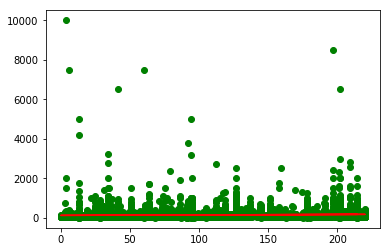

In [110]:
plt.figure()
plt.scatter(X_test,y_test,color="g")
plt.plot(X_test,y_pred,color="r")
plt.show()